In [1]:
import fitz
import matplotlib.pyplot as plt

points_table_pdf = fitz.open("C:\\Users\\tbwil\\Documents\\Projects\\IAAF_Points\\2025_points_table.pdf")

 
1352 
[None, None, 19.34, None, None, None, 18.94, None, 1390.0, None, None, 19.41, None, None, None, None, None, 1379.0, 5.82, None, None, None, None, None, 19.07, None, 1368.0, None, None, 19.54, None, None, None, None, None, 1357.0, None, None, None, None, None]
[None, 18.9, None, 1396.0, None, None, 19.37, None, 5.39, 6.2, 18.97, None, 1385.0, None, None, 19.44, None, None, None, None, None, 1374.0, None, None, None, None, 5.42, None, 19.1, None, 1363.0, None, None, 19.57, None, None, None, None, None, 1352.0, None]


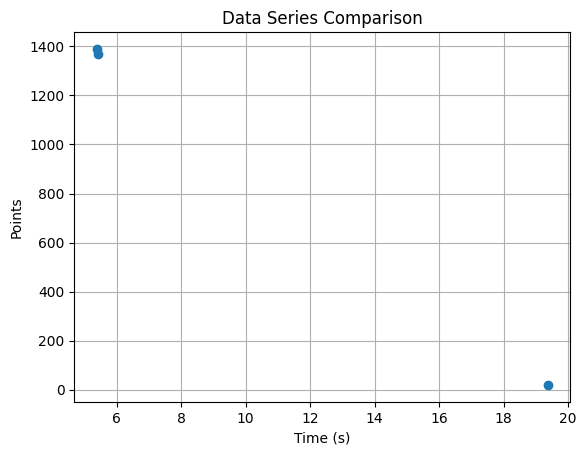

In [2]:
page = points_table_pdf[8].get_text()
rows = page.split('\n')
points = []
OM100m = []
for i in range(len(rows)):
    if((i-2)%11 == 0):
        points.append(rows[i])
    if((i-3)%11 == 0):
        OM100m.append(rows[i])
print(points[-2])
print(OM100m[-2])
points = points[1:50]
OM100m = OM100m[1:50]

points = [float(value) if (value.strip() != '-' and value.strip() != '') else None for value in points]
OM100m = [float(value) if (value.strip() != '-' and value.strip() != '') else None for value in OM100m]

print(points)
print(OM100m)

plt.plot(OM100m, points, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Points')
plt.title('Data Series Comparison')
plt.grid(True)

# Display the plot
plt.show()

In [4]:
page = points_table_pdf[98].get_text()
rows = page.split('\n')
points = []
OM100m = []
for i in range(len(rows)):
    if((i-1)%11 == 0 and i > 1):
        points.append(rows[i])
    if((i-2)%11 == 0):
        OM100m.append(rows[i])
print(points)
print(OM100m)
print(rows[13])
print(rows[13].replace(' ','').isdigit())
print(page)
# start = 0
# i = 0
# while start == 0:
#     if rows[i].replace(' ','').isdigit():
#         if int(rows[i]) == 1400:
#             start = i
#     i += 1
# print(start)

['25:15 ', ' ', '38:46 ', '1395 ', '41:46 ', '12:12 ', '52:02 ', ' - ', ' ', '38:56 ', '1384 ', '41:57 ', ' - ', '52:16 ', '25:28 ', ' ', '39:06 ', '1373 ', '42:08 ', ' - ', '52:30 ', ' - ', ' ', '39:16 ', '1362 ', '42:19 ', ' - ', '52:45 ', '25:41 ', ' ', '39:26 ', '1351 ']
[' ', '38:43 ', '1398 ', '41:43 ', ' - ', '51:58 ', '25:20 ', ' ', '38:53 ', '1387 ', '41:54 ', '12:14 ', '52:12 ', '25:26 ', ' ', '39:03 ', '1376 ', '42:05 ', ' - ', '52:26 ', '25:33 ', ' ', '39:13 ', '1365 ', '42:16 ', ' - ', '52:41 ', '25:39 ', ' ', '39:23 ', '1354 ', '42:27 ', ' - ']
38:43 
False
 MEN’S ROAD RUNNING / HOMMES COURSES SUR ROUTE 
92 
 
Points 
5km  
10km 
15km 
10 Miles 
20km 
 
1400 
12:10 
25:15 
38:43 
41:40 
51:50 
 
1399 
 - 
25:16 
38:44 
41:41 
51:52 
 
1398 
 - 
 - 
38:45 
41:42 
51:53 
 
1397 
 - 
25:17 
38:46 
41:43 
51:54 
 
1396 
12:11 
 - 
 - 
41:44 
51:56 
 
1395 
 - 
25:18 
38:47 
41:45 
51:57 
 
1394 
 - 
 - 
38:48 
41:46 
51:58 
 
1393 
 - 
25:19 
38:49 
41:47 
51:59 
 
1392 
12:1

In [5]:
points = []
num_events = 10
event_list = [[] for _ in range(num_events+1)]
event = []
for page_num in range(8,36):
    points_batch = []
    event_batch = [[] for _ in range(num_events+1)]
    page = points_table_pdf[page_num].get_text()
    rows = page.split('\n')
    page_odd = page_num % 2
    for i in range(2,len(rows)):
        if((i - 2 + page_odd) % 11 == 0):
            points_batch.append(rows[i])
        for j in range(1,num_events+1):
            if((i - 2 + page_odd) % 11 == j):
                event_batch[j].append(rows[i])
    for j in range(1,num_events+1):
        event_list[j] = event_list[j] + event_batch[j][1:51]
        # if((i - 3 + page_odd) % 11 == 0):
        #     event_batch.append(rows[i])
    points = points + points_batch[1:51]
    # event = event + event_batch[1:51]
print(points)
event_num = 10
print(event_list[event_num])

# should give the full lists. Need to check sizes to see if correct
print(len(points))
print(len(event_list[event_num]))
# print(len(event))

['1400 ', '1399 ', '1398 ', '1397 ', '1396 ', '1395 ', '1394 ', '1393 ', '1392 ', '1391 ', '1390 ', '1389 ', '1388 ', '1387 ', '1386 ', '1385 ', '1384 ', '1383 ', '1382 ', '1381 ', '1380 ', '1379 ', '1378 ', '1377 ', '1376 ', '1375 ', '1374 ', '1373 ', '1372 ', '1371 ', '1370 ', '1369 ', '1368 ', '1367 ', '1366 ', '1365 ', '1364 ', '1363 ', '1362 ', '1361 ', '1360 ', '1359 ', '1358 ', '1357 ', '1356 ', '1355 ', '1354 ', '1353 ', '1352 ', '1351 ', '1350 ', '1349 ', '1348 ', '1347 ', '1346 ', '1345 ', '1344 ', '1343 ', '1342 ', '1341 ', '1340 ', '1339 ', '1338 ', '1337 ', '1336 ', '1335 ', '1334 ', '1333 ', '1332 ', '1331 ', '1330 ', '1329 ', '1328 ', '1327 ', '1326 ', '1325 ', '1324 ', '1323 ', '1322 ', '1321 ', '1320 ', '1319 ', '1318 ', '1317 ', '1316 ', '1315 ', '1314 ', '1313 ', '1312 ', '1311 ', '1310 ', '1309 ', '1308 ', '1307 ', '1306 ', '1305 ', '1304 ', '1303 ', '1302 ', '1301 ', '1300 ', '1299 ', '1298 ', '1297 ', '1296 ', '1295 ', '1294 ', '1293 ', '1292 ', '1291 ', '1290 ', 

Plan is to extract the data from the pdf file and write it as a json so the computation only has to be done once.

In [6]:
points = []
# num_events = 6
page_start = 38
num_pages = 28
# get first page
page1 = points_table_pdf[page_start].get_text()
rows1 = page1.split('\n')
num_events = 0
start = 0
for i in range(len(rows1)):
    if rows1[i].replace(' ','').isdigit():
        if int(rows1[i]) == 1400:
            start = i
        if int(rows1[i]) == 1399:
            num_events = i - start - 1
    if num_events != 0:
        break
print(start)
print(num_events)

event_list = [[] for _ in range(num_events+1)]
event = []

# collect data
for page_num in range(page_start,page_start+num_pages):
    points_batch = []
    event_batch = [[] for _ in range(num_events+1)]
    page = points_table_pdf[page_num].get_text()
    rows = page.split('\n')
    page_odd = page_num % 2
    for i in range(2,len(rows)):
        if((i - 2 + page_odd) % (num_events+1) == 0):
            points_batch.append(rows[i])
        for j in range(1,num_events+1):
            if((i - 2 + page_odd) % (num_events+1) == j):
                event_batch[j].append(rows[i])
    for j in range(1,num_events+1):
        event_list[j] = event_list[j] + event_batch[j][1:51]
    points = points + points_batch[1:51]
print(points)
event_num = 6
print(event_list[event_num])

print(len(points))
print(len(event_list[event_num]))

9
6
['1400 ', '1399 ', '1398 ', '1397 ', '1396 ', '1395 ', '1394 ', '1393 ', '1392 ', '1391 ', '1390 ', '1389 ', '1388 ', '1387 ', '1386 ', '1385 ', '1384 ', '1383 ', '1382 ', '1381 ', '1380 ', '1379 ', '1378 ', '1377 ', '1376 ', '1375 ', '1374 ', '1373 ', '1372 ', '1371 ', '1370 ', '1369 ', '1368 ', '1367 ', '1366 ', '1365 ', '1364 ', '1363 ', '1362 ', '1361 ', '1360 ', '1359 ', '1358 ', '1357 ', '1356 ', '1355 ', '1354 ', '1353 ', '1352 ', '1351 ', '1350 ', '1349 ', '1348 ', '1347 ', '1346 ', '1345 ', '1344 ', '1343 ', '1342 ', '1341 ', '1340 ', '1339 ', '1338 ', '1337 ', '1336 ', '1335 ', '1334 ', '1333 ', '1332 ', '1331 ', '1330 ', '1329 ', '1328 ', '1327 ', '1326 ', '1325 ', '1324 ', '1323 ', '1322 ', '1321 ', '1320 ', '1319 ', '1318 ', '1317 ', '1316 ', '1315 ', '1314 ', '1313 ', '1312 ', '1311 ', '1310 ', '1309 ', '1308 ', '1307 ', '1306 ', '1305 ', '1304 ', '1303 ', '1302 ', '1301 ', '1300 ', '1299 ', '1298 ', '1297 ', '1296 ', '1295 ', '1294 ', '1293 ', '1292 ', '1291 ', '1290

In [ ]:
page_start = 248
num_pages = 28

def get_rows(page):
    rows = page.split('\n')
    rows = [r.strip() for r in rows if r.strip() != '']
    return rows

# get first page
page1 = points_table_pdf[page_start].get_text()
rows1 = get_rows(page1)
num_events = 0
start = 0
for i in range(len(rows1)):
    if rows1[i].replace(' ','').isdigit():
        if int(rows1[i]) == 1400:
            start = i
        if int(rows1[i]) == 1399:
            num_events = i - start - 1
    if num_events != 0:
        break
print(start)
print(num_events)

def get_start_loc(rows, page_num):
    start = 0
    for i in range(len(rows)):
        if rows[i].replace(' ','').isdigit():
            if (int(rows[i]) % 50 == 0) and (int(rows[i]) <= (1400 - 50*page_num)):
                start = i
    return start

headers = rows1[start-num_events:start]
print(headers)
event_list = [[] for _ in range(num_events+1)]
event = []

# collect data
for page_num in range(page_start,page_start+num_pages):
    points_batch = []
    event_batch = [[] for _ in range(num_events+1)]
    page = points_table_pdf[page_num].get_text()
    rows = get_rows(page)
    page_odd = page_num % 2
    start_loc = get_start_loc(rows,page_num-page_start) - num_events * page_odd
    for i in range(start_loc,len(rows)):
        for j in range(num_events+1):
            if((i - start_loc + page_odd) % (num_events+1) == j):
                event_batch[j].append(rows[i])
    for j in range(num_events+1):
        event_list[j] = event_list[j] + event_batch[j][0:50]
print(event_list[0])
event_num = 9
print(event_list[event_num])

print(len(event_list[0]))
print(len(event_list[event_num]))

12
9
['HJ', 'PV', 'LJ', 'TJ', 'SP', 'DT', 'HT', 'JT', 'Decathlon']
['1400', '1399', '1398', '1397', '1396', '1395', '1394', '1393', '1392', '1391', '1390', '1389', '1388', '1387', '1386', '1385', '1384', '1383', '1382', '1381', '1380', '1379', '1378', '1377', '1376', '1375', '1374', '1373', '1372', '1371', '1370', '1369', '1368', '1367', '1366', '1365', '1364', '1363', '1362', '1361', '1360', '1359', '1358', '1357', '1356', '1355', '1354', '1353', '1352', '1351', '1350', '1349', '1348', '1347', '1346', '1345', '1344', '1343', '1342', '1341', '1340', '1339', '1338', '1337', '1336', '1335', '1334', '1333', '1332', '1331', '1330', '1329', '1328', '1327', '1326', '1325', '1324', '1323', '1322', '1321', '1320', '1319', '1318', '1317', '1316', '1315', '1314', '1313', '1312', '1311', '1310', '1309', '1308', '1307', '1306', '1305', '1304', '1303', '1302', '1301', '1300', '1299', '1298', '1297', '1296', '1295', '1294', '1293', '1292', '1291', '1290', '1289', '1288', '1287', '1286', '1285', '128

Final Copy

In [29]:
import re
import json
import fitz

points_table_pdf = fitz.open("C:\\Users\\tbwil\\Documents\\Projects\\IAAF_Points\\2025_points_table.pdf")

page_start = 8
num_pages = 28
suffixes = [' sh', ' SC', ' km', ' Mile', ' Miles']

def get_rows(page, protected_phrases=None):
    if protected_phrases is None:
        protected_phrases = []

    # Generate unique placeholders for each protected phrase
    placeholders = {phrase: f"__PLACEHOLDER_{i}__" for i, phrase in enumerate(protected_phrases)}
    
    # Replace each protected phrase with its placeholder
    for phrase, placeholder in placeholders.items():
        page = page.replace(phrase, placeholder)

    # Split on newlines and spaces
    raw_parts = re.split(r'[\n ]+', page)

    # Restore protected phrases
    rows = [part.strip() for part in raw_parts if part.strip() != '']
    for i in range(len(rows)):
        for phrase, placeholder in placeholders.items():
            rows[i] = rows[i].replace(placeholder, phrase)
    
    return rows

def get_start_loc(rows, page_num):
    start = 0
    for i in range(len(rows)):
        if rows[i].replace(' ','').isdigit():
            if (int(rows[i]) % 50 == 0) and (int(rows[i]) <= (1400 - 50*page_num)):
                start = i
    return start

def extract_event_points(page_start):
    # get first page
    page1 = points_table_pdf[page_start].get_text()
    rows1 = get_rows(page1, suffixes)
    num_events = 0
    start = 0
    for i in range(len(rows1)):
        if rows1[i].isdigit():
            if int(rows1[i]) == 1400:
                start = i
            if int(rows1[i]) == 1399:
                num_events = i - start - 1
        if num_events != 0:
            break

    # get headers
    headers = rows1[start-num_events:start]
    event_list = [[] for _ in range(num_events+1)]

    # collect data
    for page_num in range(page_start,page_start+num_pages):
        event_batch = [[] for _ in range(num_events+1)]
        page = points_table_pdf[page_num].get_text()
        rows = get_rows(page, suffixes)
        page_odd = page_num % 2
        start_loc = get_start_loc(rows, page_num-page_start) - num_events * page_odd
        for i in range(start_loc,len(rows)):
            for j in range(num_events+1):
                if((i - start_loc + page_odd) % (num_events+1) == j):
                    event_batch[j].append(rows[i])
        for j in range(num_events+1):
            event_list[j] = event_list[j] + event_batch[j][0:50]

    return headers, event_list

M_headers = []
W_headers = []
M_event_scores = []
W_event_scores = []

for i in range(26):
    header, event_list = extract_event_points(page_start+i*30)
    if i == 0:
        points = event_list[0]
    if i <13:
        M_event_scores = M_event_scores + event_list[1:]
        M_headers = M_headers + header
    else:
        W_event_scores = W_event_scores + event_list[1:]
        W_headers = W_headers + header

M_dict_results = {M_headers[i]:M_event_scores[i] for i in range(len(M_headers))}
W_dict_results = {W_headers[i]:W_event_scores[i] for i in range(len(W_headers))}
total_results = {'Points':points, 'Men':M_dict_results, 'Women':W_dict_results}

json_results = json.dumps(total_results, indent=4)
with open('2025_points_table.json', 'w') as f:
    f.write(json_results)